# Preparing the data
Combining data into two datasets, one that contains all rent prices and one that contains all buy prices.

In [11]:
import pandas as pd
import glob
import os
buy_files = glob.glob(os.path.join("./dataset/", "apartments_pl*"))
rent_files = glob.glob(os.path.join("./dataset/", "apartments_rent*"))

buy_df = pd.DataFrame()
rent_df = pd.DataFrame()

for file in buy_files:
    df = pd.read_csv(file)
    base = os.path.basename(file)
    date = base[-11:-4]  # 2024_02 transform later if needed
    df["date"] = date
    buy_df = pd.concat([buy_df, df])

for file in rent_files:
    df = pd.read_csv(file)
    base = os.path.basename(file)
    date = base[-11:-4]  # 2024_02 transform later if needed
    df["date"] = date
    rent_df = pd.concat([rent_df, df])

buy_df.to_csv("buy.csv", index=False)
rent_df.to_csv("rent.csv", index=False)

## Correlation between points of interest (POI) and prices

Correlation matrixes

In [12]:
import pandas as pd
buy_df = pd.read_csv("buy.csv")
rent_df = pd.read_csv("rent.csv")

tested_features = [
    "poiCount",
    "schoolDistance",
    "clinicDistance",
    "postOfficeDistance",
    "kindergartenDistance",
    "restaurantDistance",
    "collegeDistance",
    "pharmacyDistance",
    "price",
]

correlation_buy = buy_df[tested_features].corr()
correlation_rent = rent_df[tested_features].corr()

print("Correlation matrix for buy", correlation_buy["price"], sep="\n")
print("Correlation matrix for rent", correlation_rent["price"], sep="\n")

for city in buy_df["city"].unique():
    correlation_buy = buy_df[buy_df["city"] == city][tested_features].corr()
    print(f"Correlation matrix for buy in {city}", correlation_buy["price"], sep="\n")

for city in rent_df["city"].unique():
    correlation_rent = rent_df[rent_df["city"] == city][tested_features].corr()
    print(f"Correlation matrix for rent in {city}", correlation_rent["price"], sep="\n")

Correlation matrix for buy
poiCount                0.184639
schoolDistance         -0.000032
clinicDistance         -0.107165
postOfficeDistance     -0.011941
kindergartenDistance   -0.016408
restaurantDistance     -0.105686
collegeDistance        -0.014567
pharmacyDistance       -0.013712
price                   1.000000
Name: price, dtype: float64
Correlation matrix for rent
poiCount                0.180689
schoolDistance         -0.070784
clinicDistance         -0.146804
postOfficeDistance     -0.057638
kindergartenDistance   -0.065827
restaurantDistance     -0.155015
collegeDistance        -0.086960
pharmacyDistance       -0.069603
price                   1.000000
Name: price, dtype: float64
Correlation matrix for buy in szczecin
poiCount               -0.005292
schoolDistance          0.088632
clinicDistance          0.050508
postOfficeDistance      0.024738
kindergartenDistance    0.011931
restaurantDistance     -0.015733
collegeDistance         0.057295
pharmacyDistance        0

Plot charts

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
output_dir = 'poi_charts'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
poi_features = ['poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance', 'collegeDistance', 'pharmacyDistance']


def plot_price_correlations(df, title, filename=None, show_plot=False):
    correlations = []
    for feature in poi_features:
        corr = df[feature].corr(df['price'])
        correlations.append(corr)

    corr_df = pd.DataFrame({
        'feature': poi_features,
        'correlation': correlations
    })

    plt.figure(figsize=(10, 6))
    bars = plt.barh(corr_df['feature'], corr_df['correlation'], color=[
        'red' if x < 0 else 'green' for x in corr_df['correlation']
    ])

    for bar in bars:
        width = bar.get_width()
        position = bar.get_y() + bar.get_height() / 2
        plt.text(width, position, f'{width:.2f}', va='center')

    plt.xlim(-1, 1)
    plt.xlabel('correlation with price')
    plt.title(title)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=200)

    if show_plot:
        plt.show()
    else:
        plt.close()

Feature correlation with price for each city

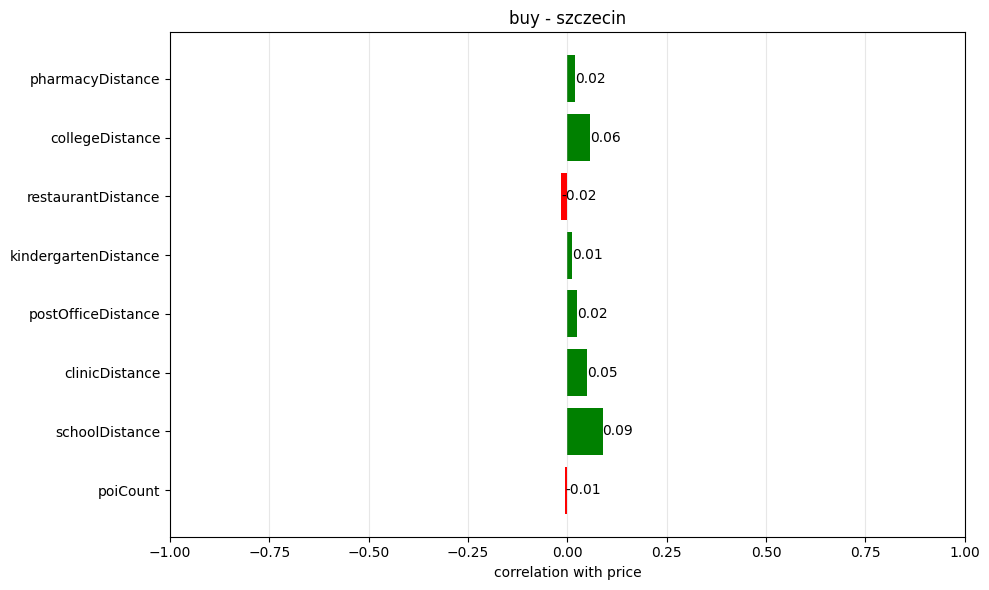

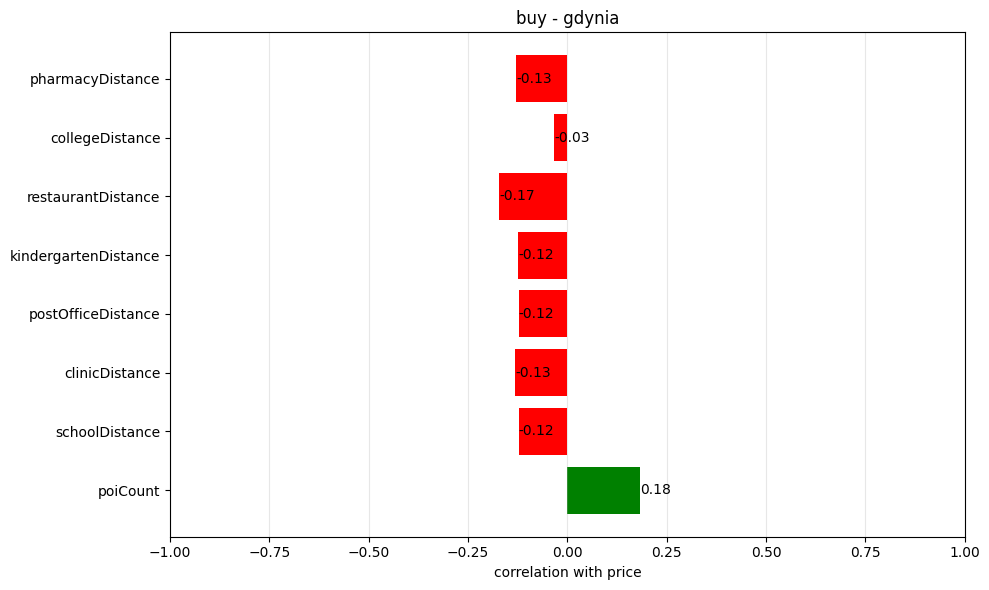

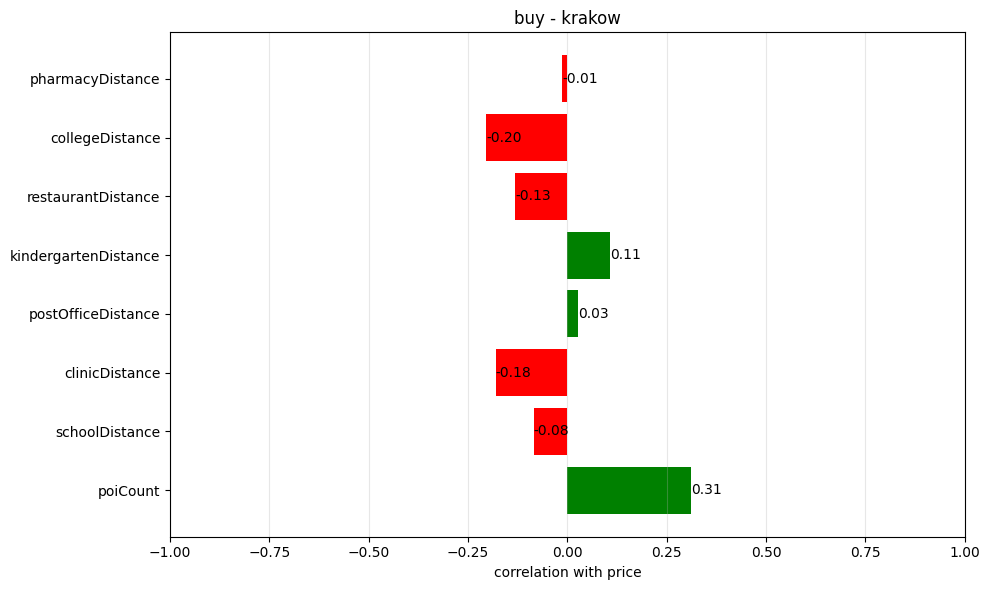

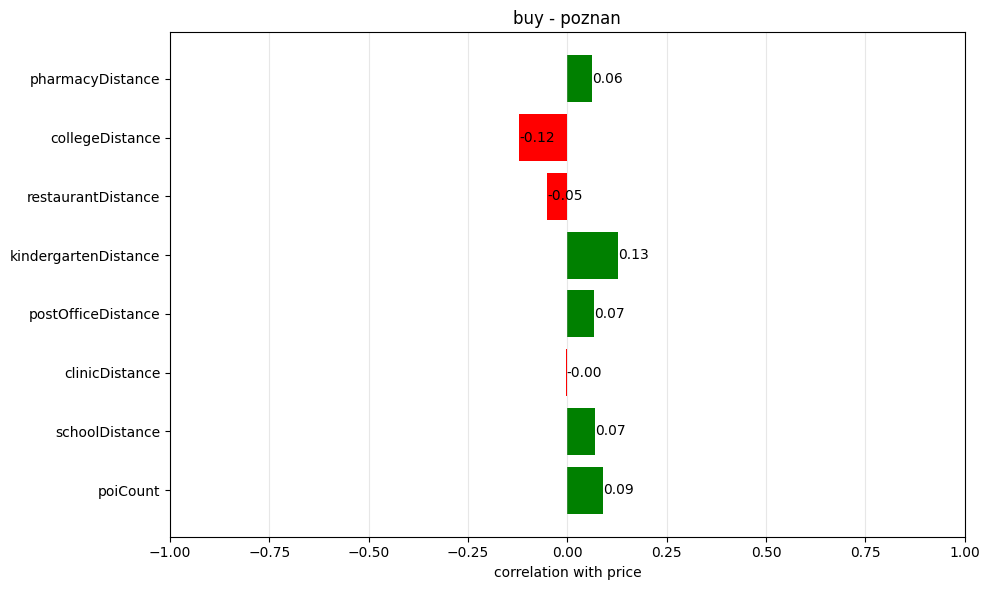

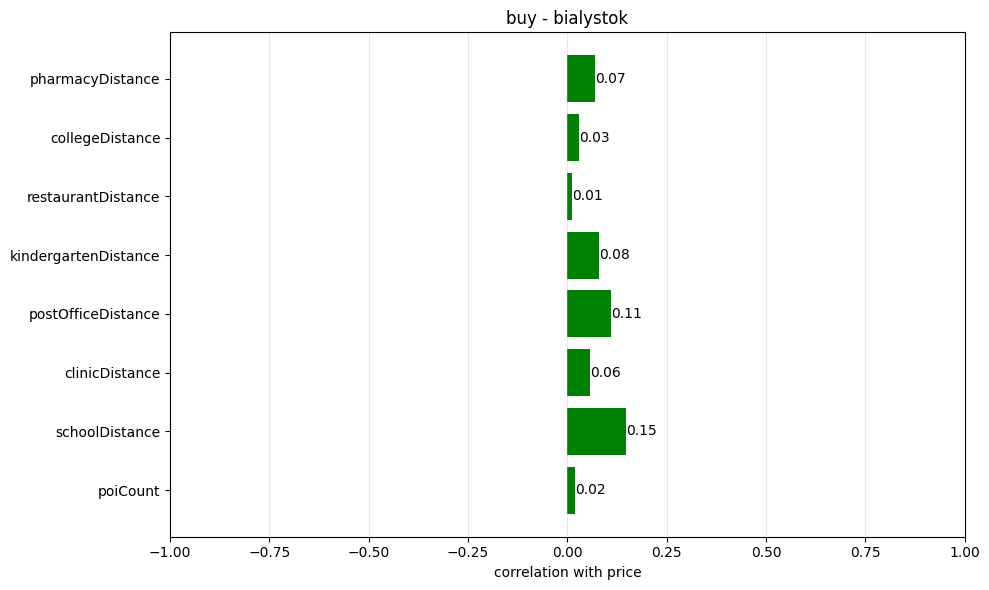

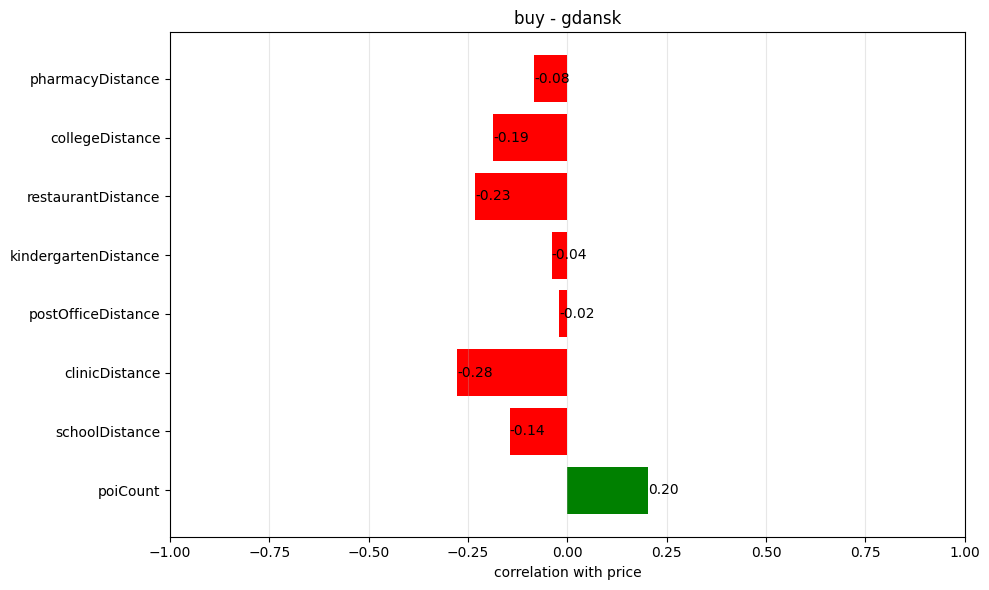

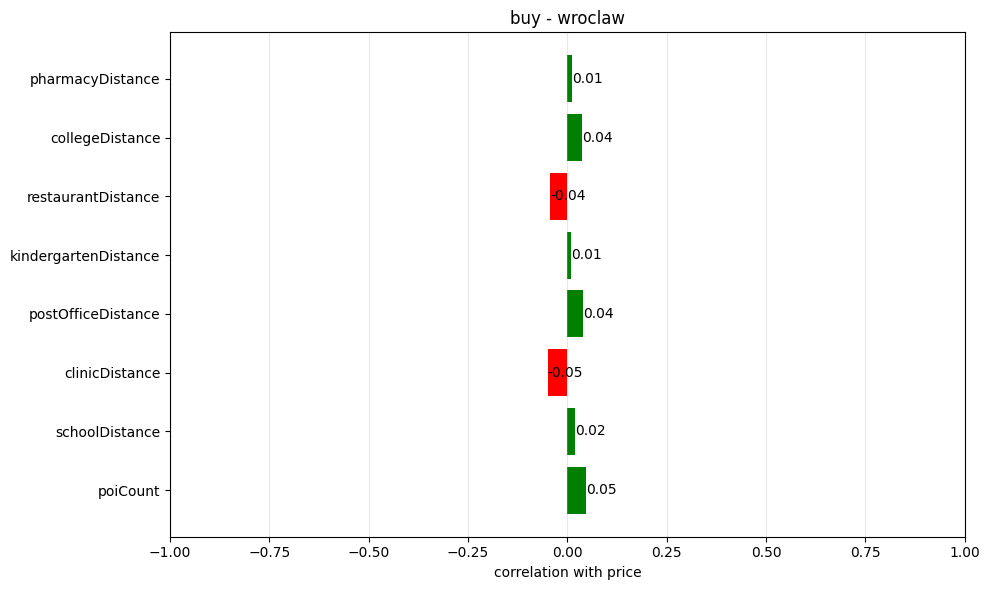

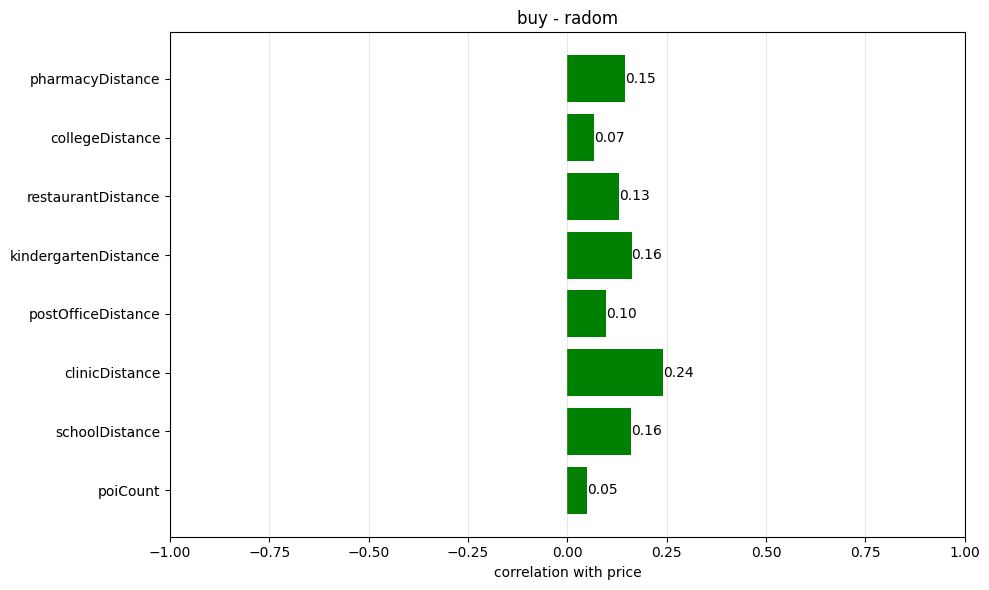

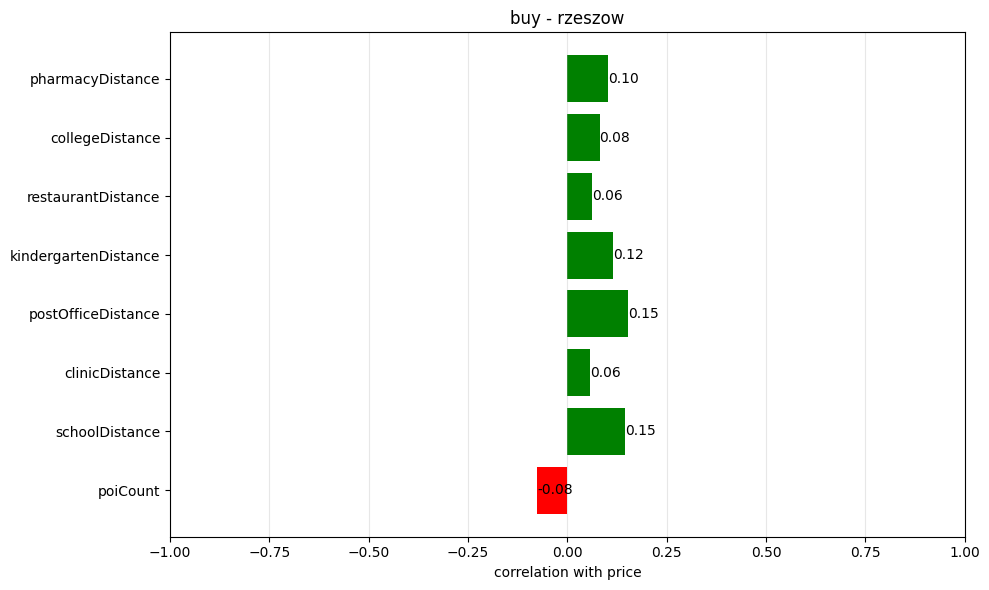

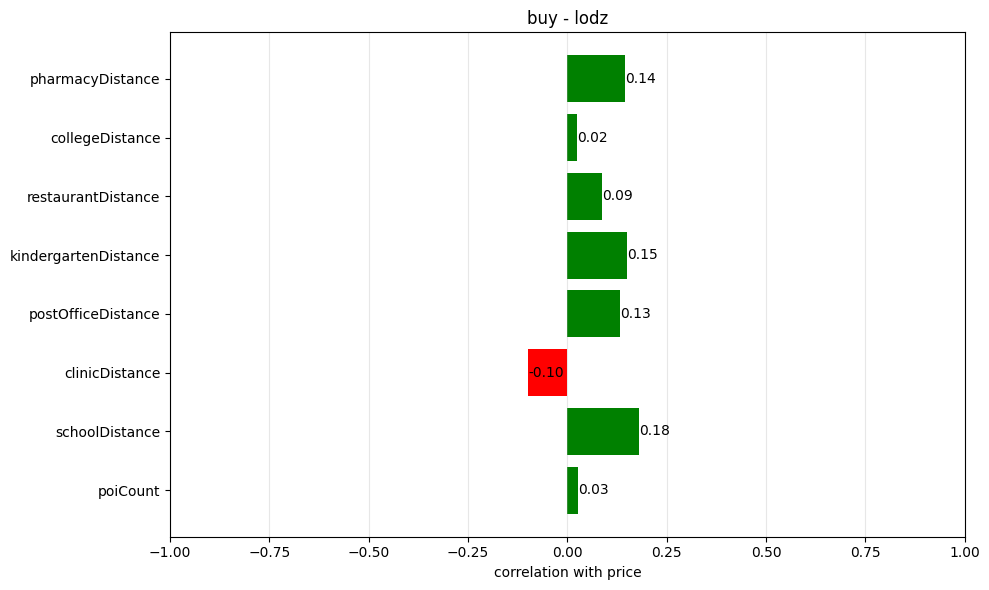

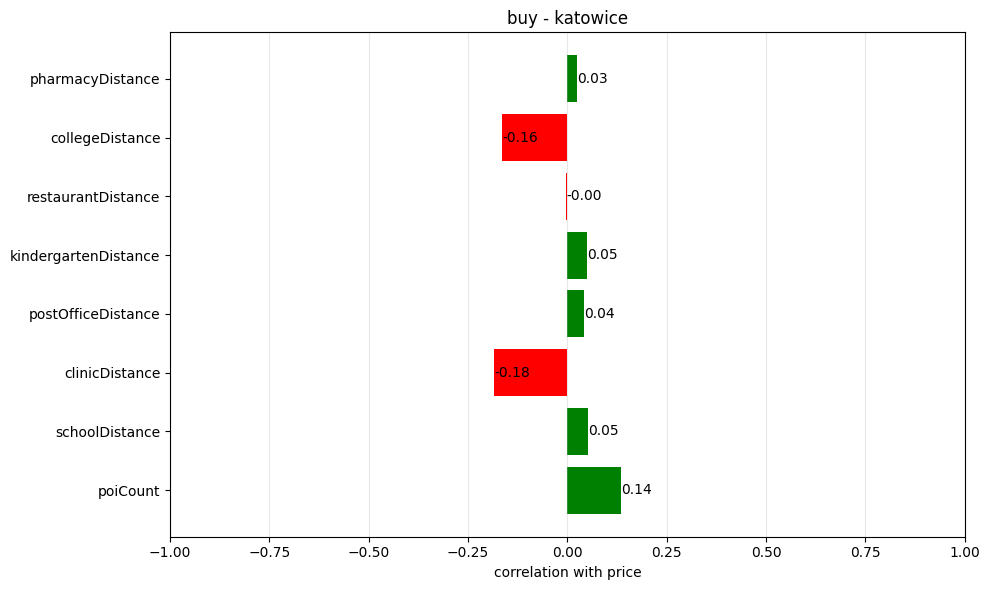

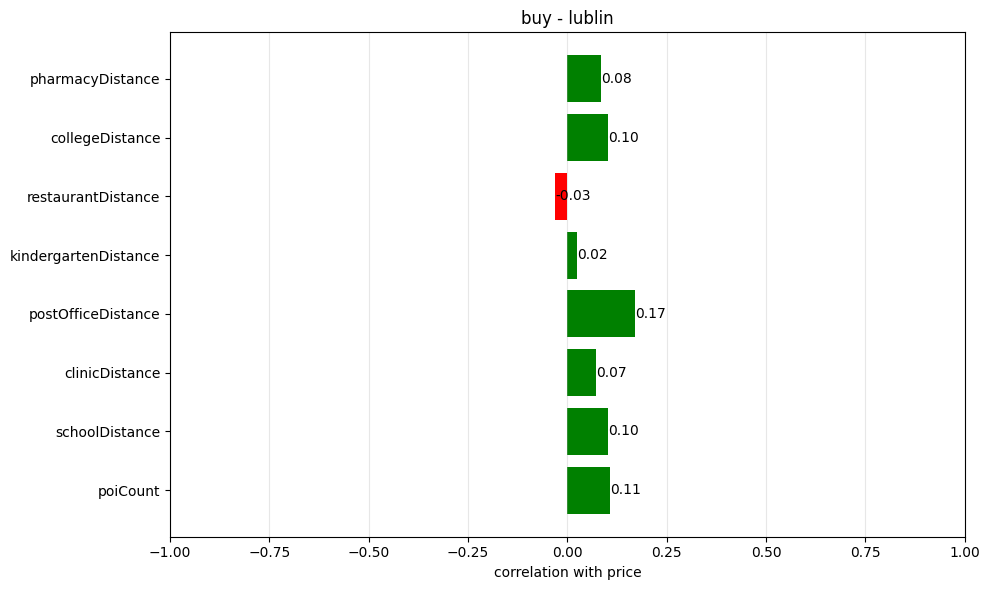

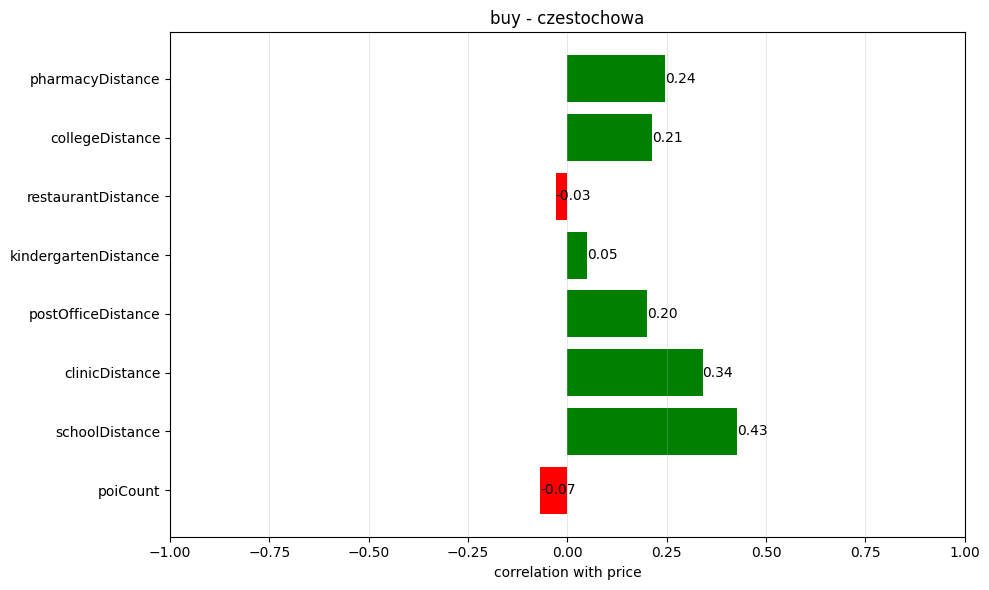

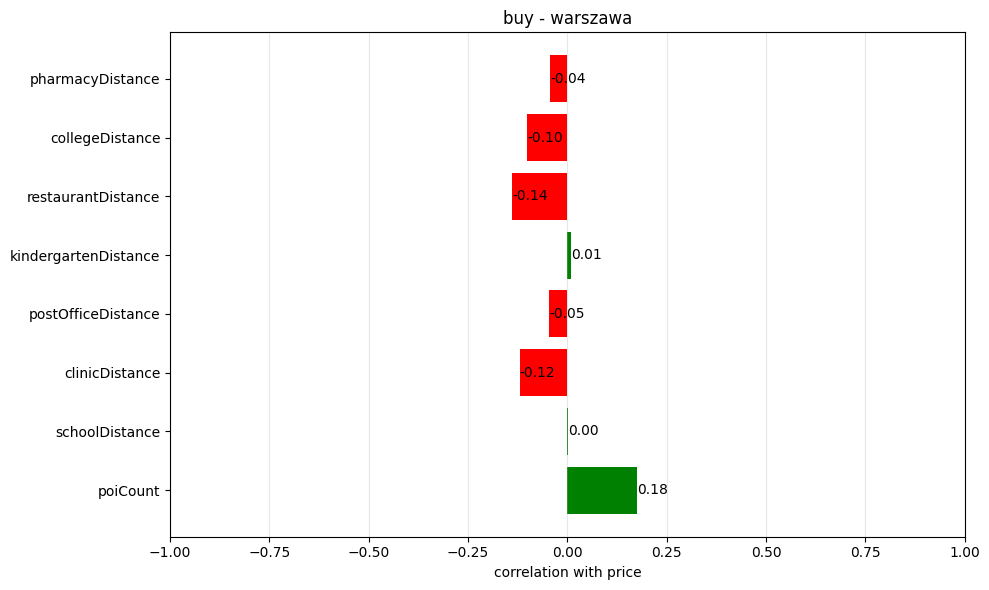

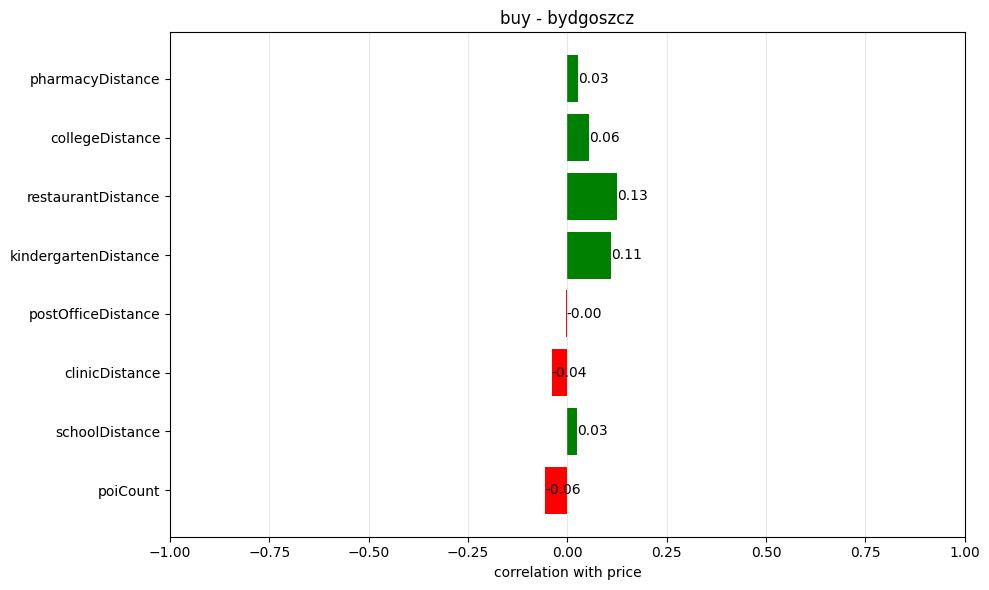

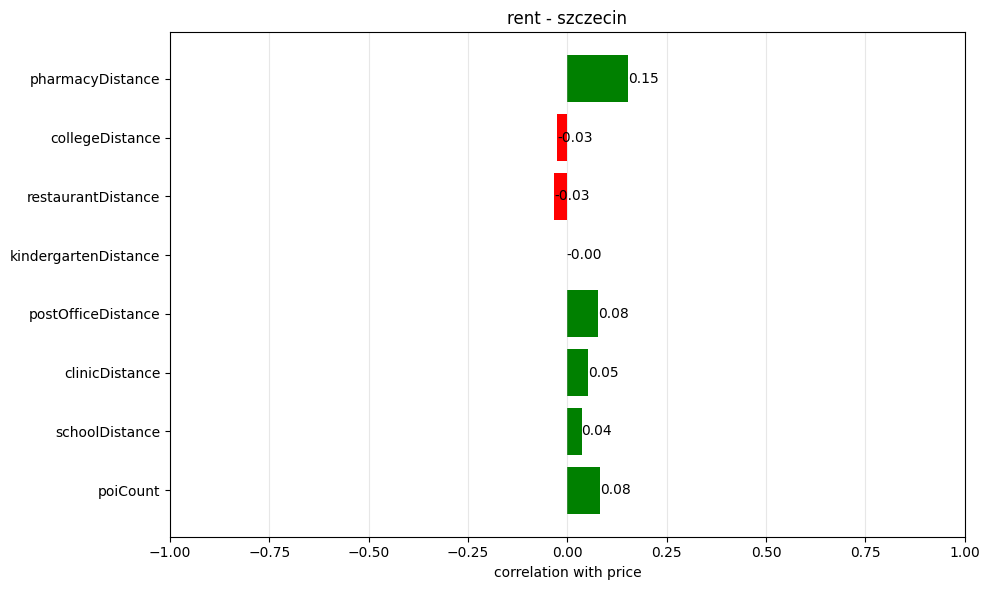

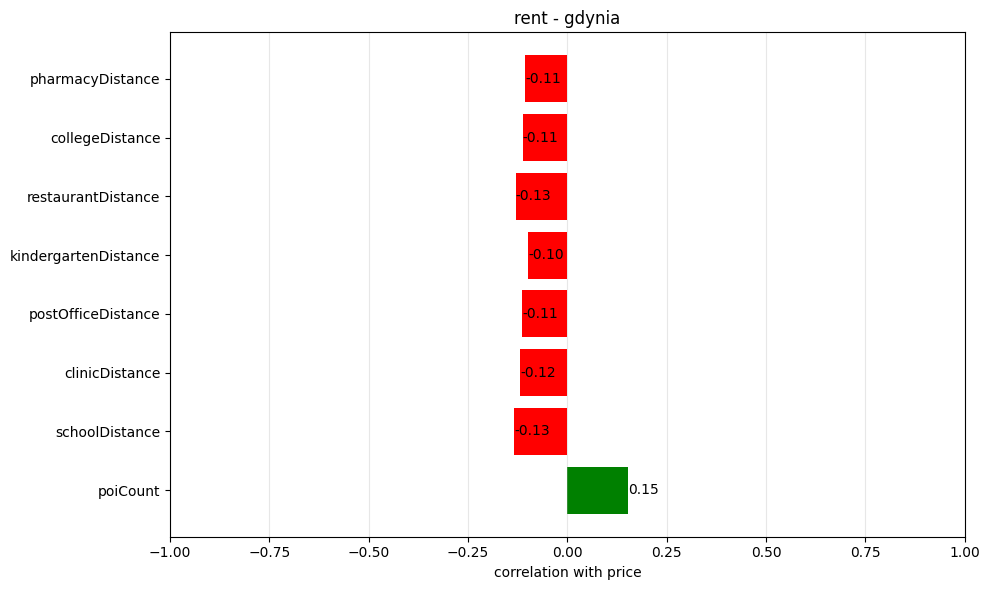

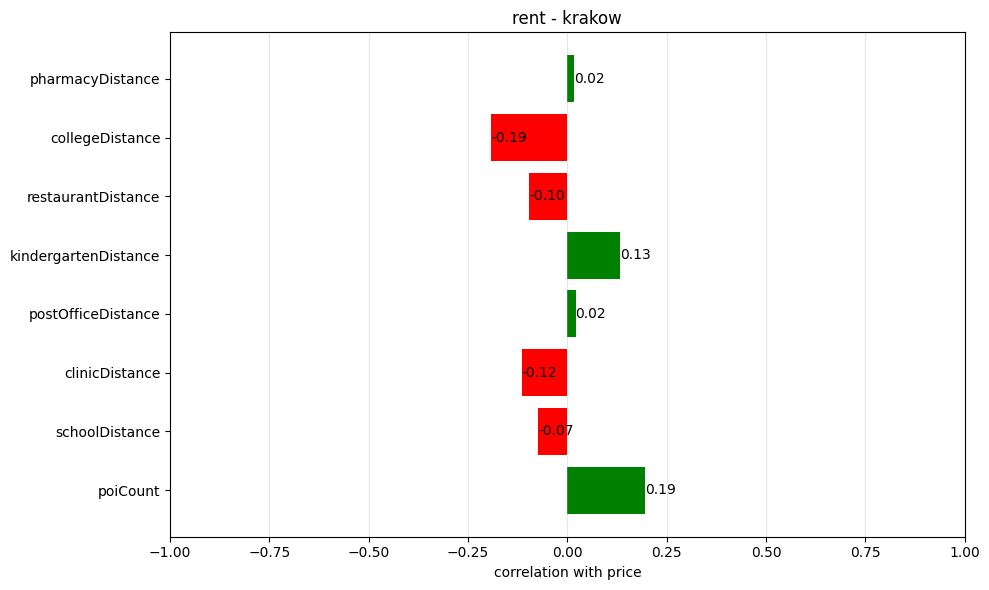

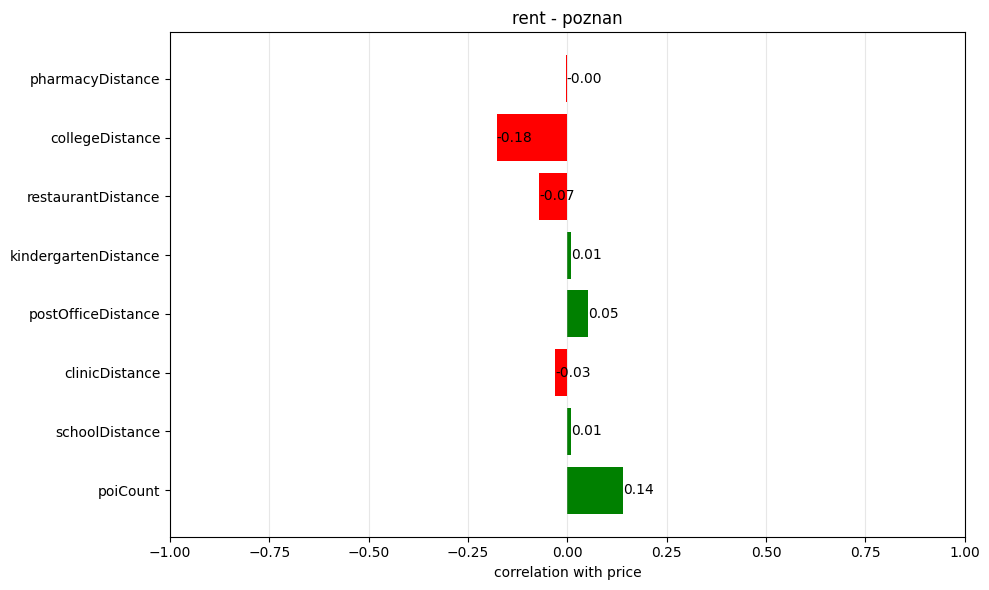

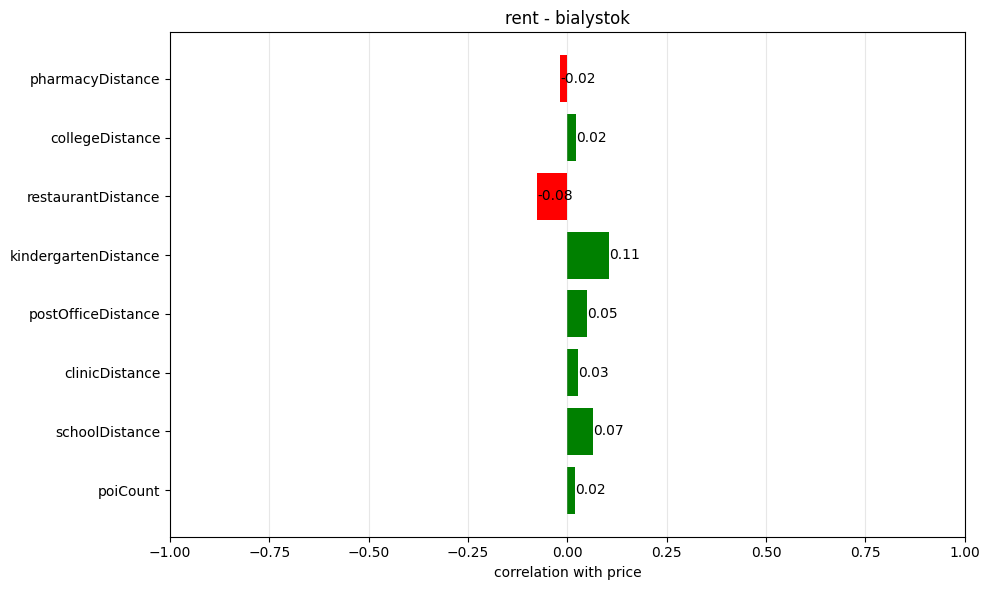

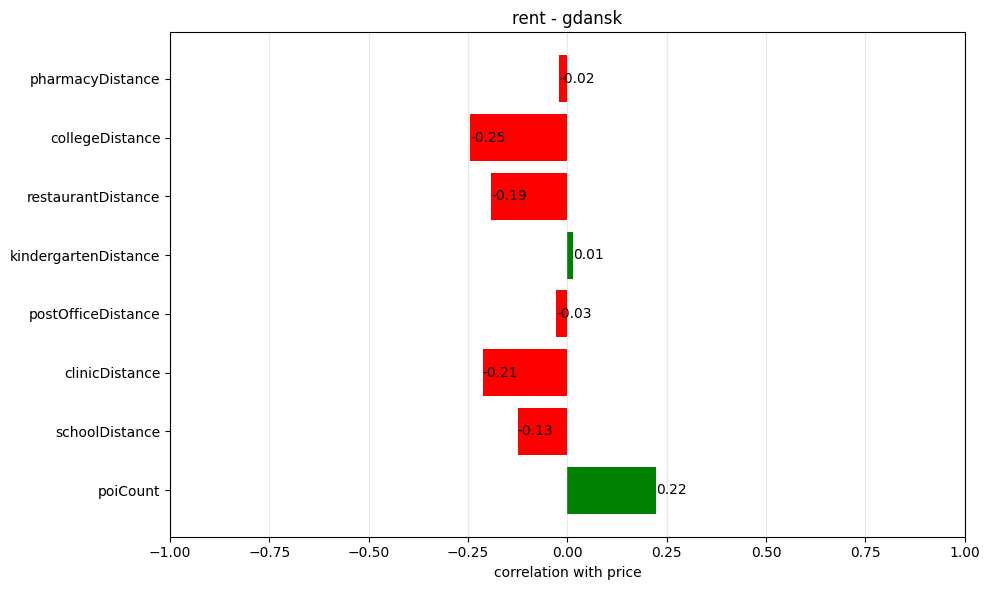

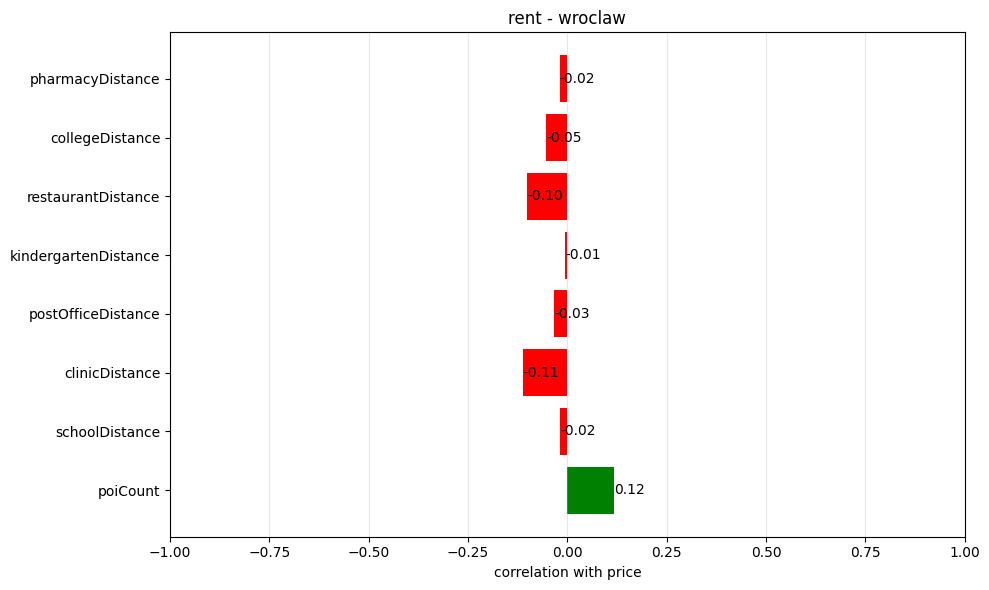

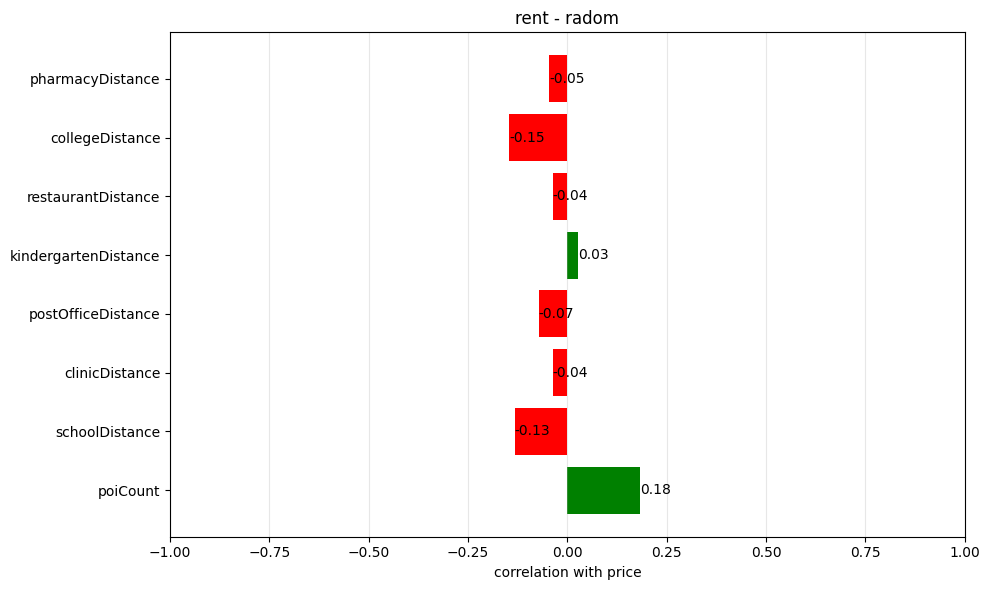

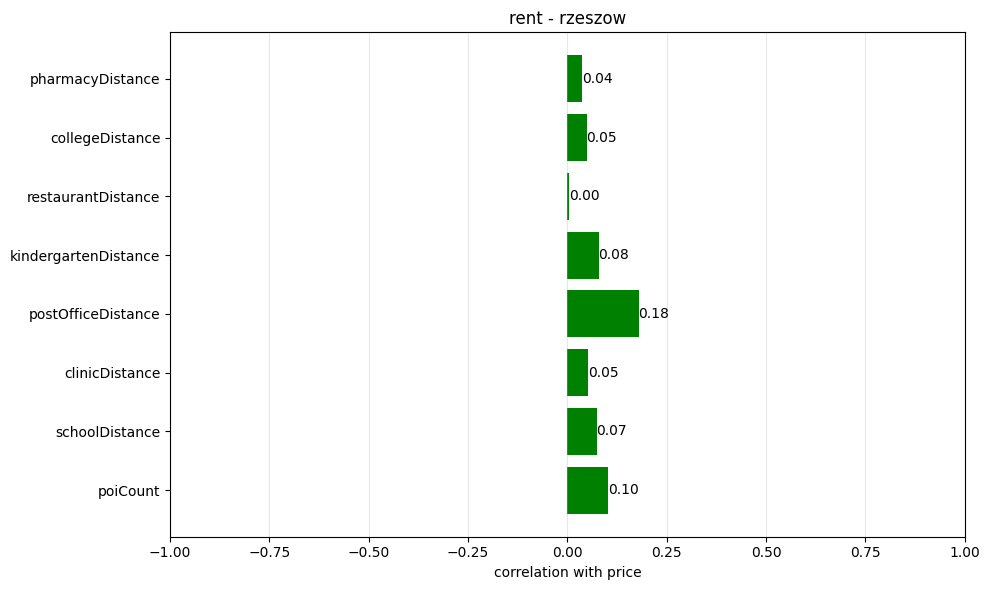

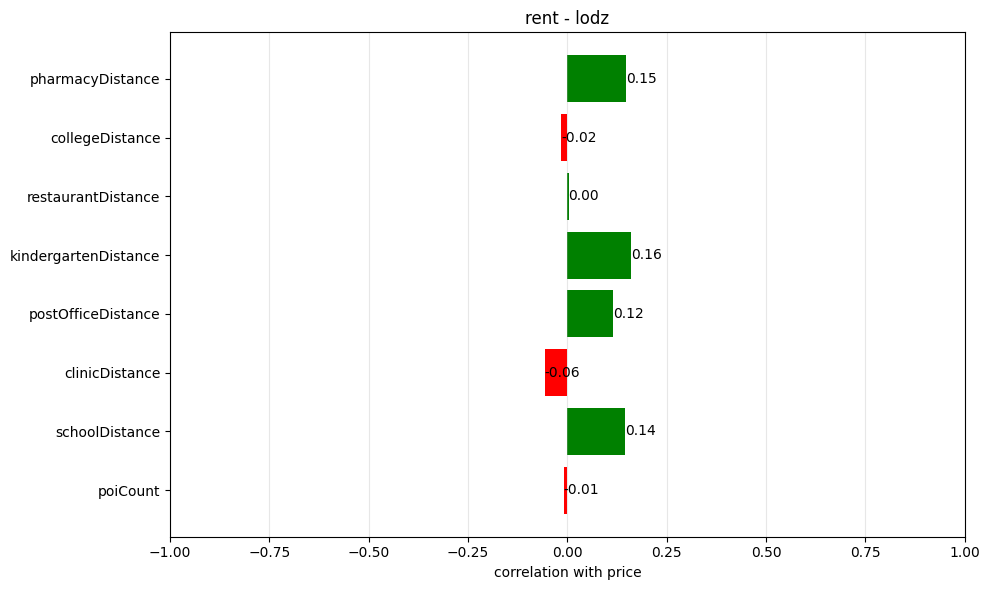

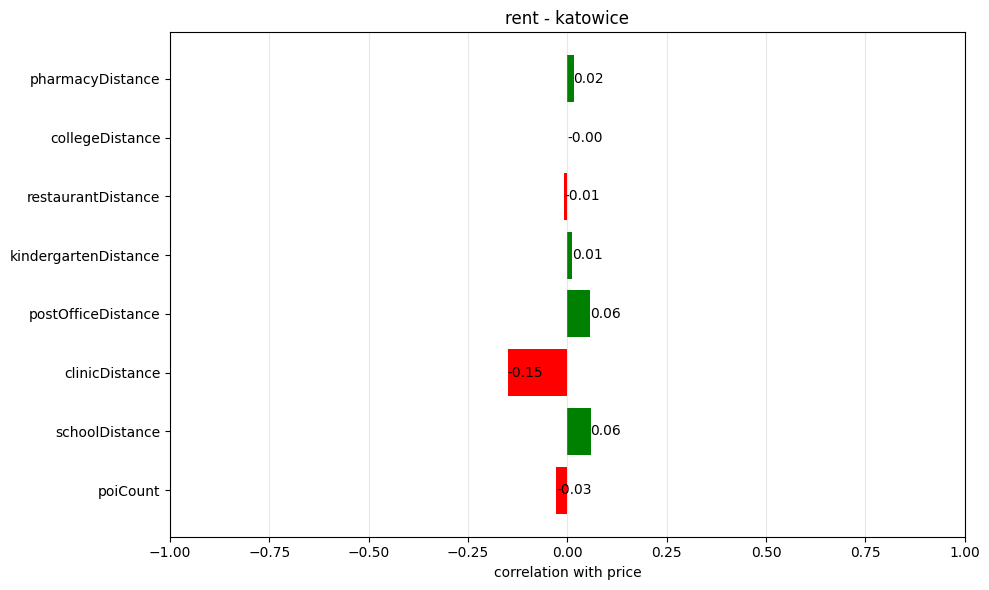

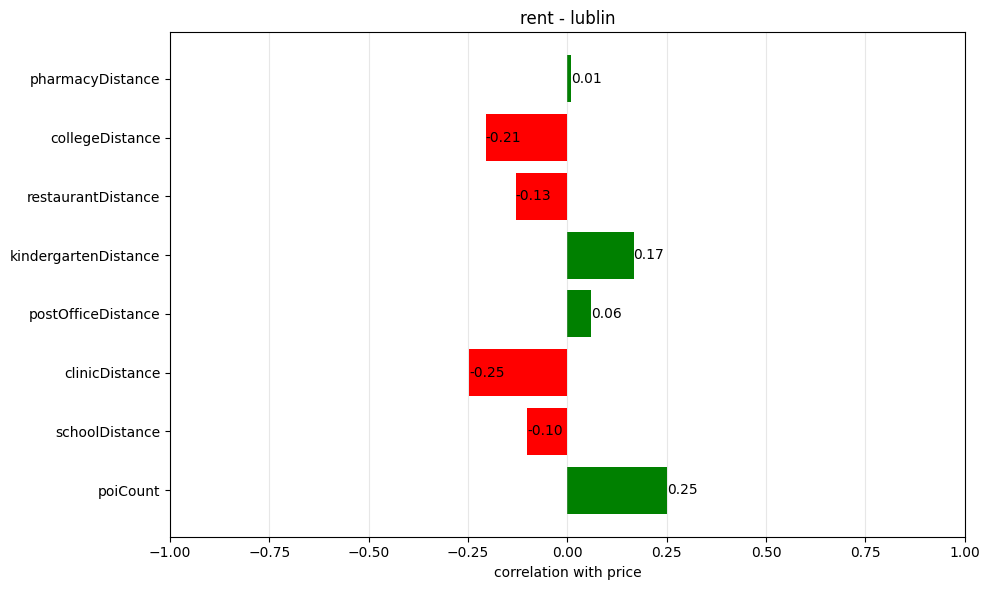

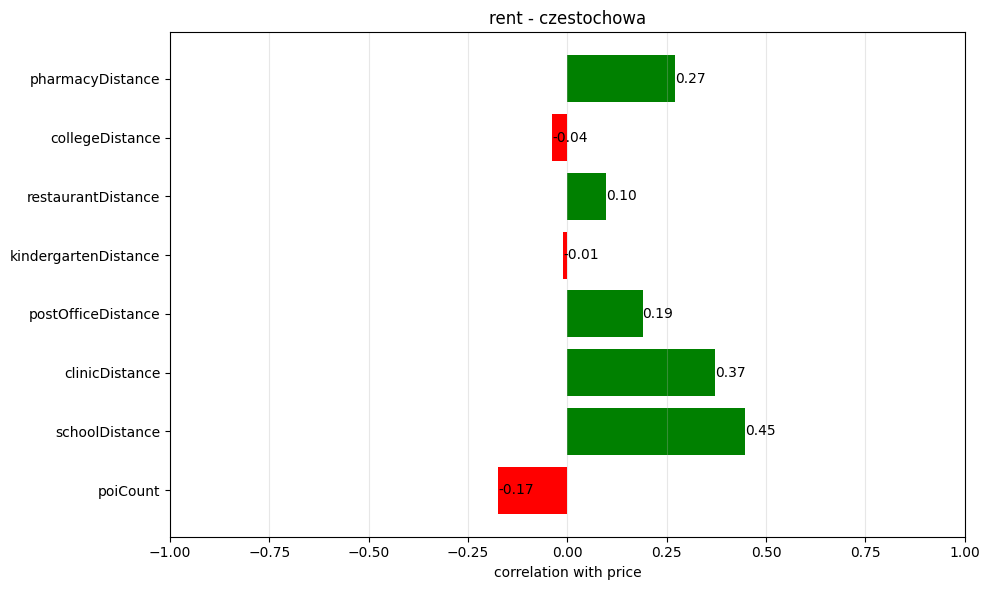

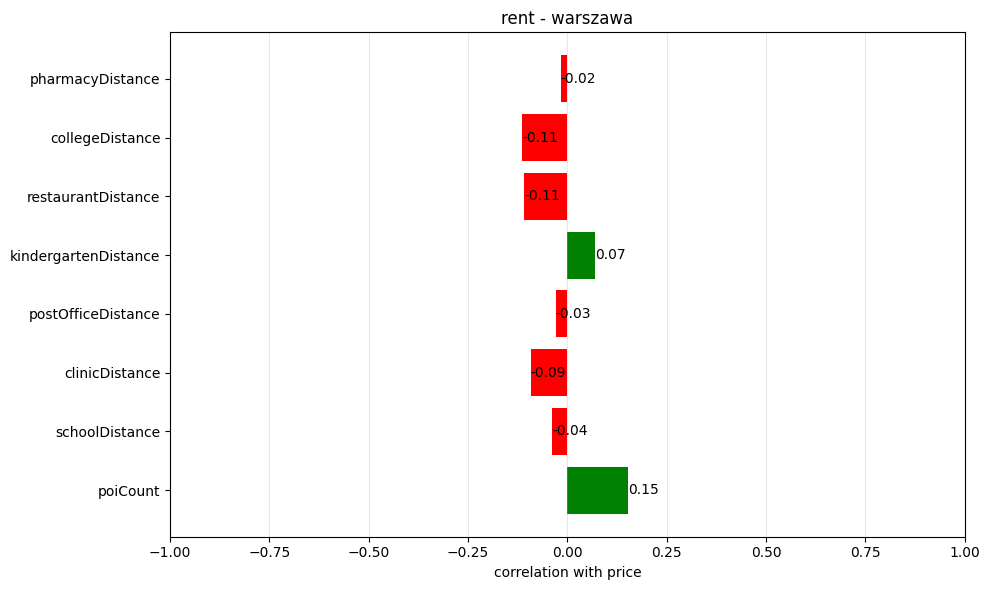

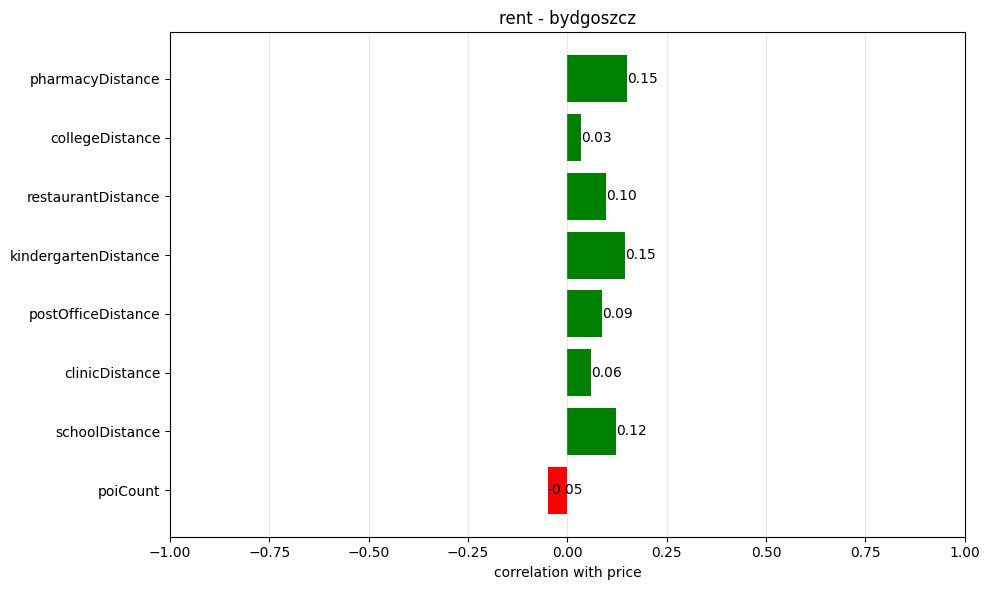

In [14]:
for city in buy_df['city'].unique():
    city_df = buy_df[buy_df['city'] == city]
    plot_price_correlations(city_df, f'buy - {city}', f'{output_dir}/buy_{city}.png', show_plot=True)

for city in rent_df['city'].unique():
    city_df = rent_df[rent_df['city'] == city]
    plot_price_correlations(city_df, f'rent - {city}', f'{output_dir}/rent_{city}.png', show_plot=True)

Overall feature correlation with price

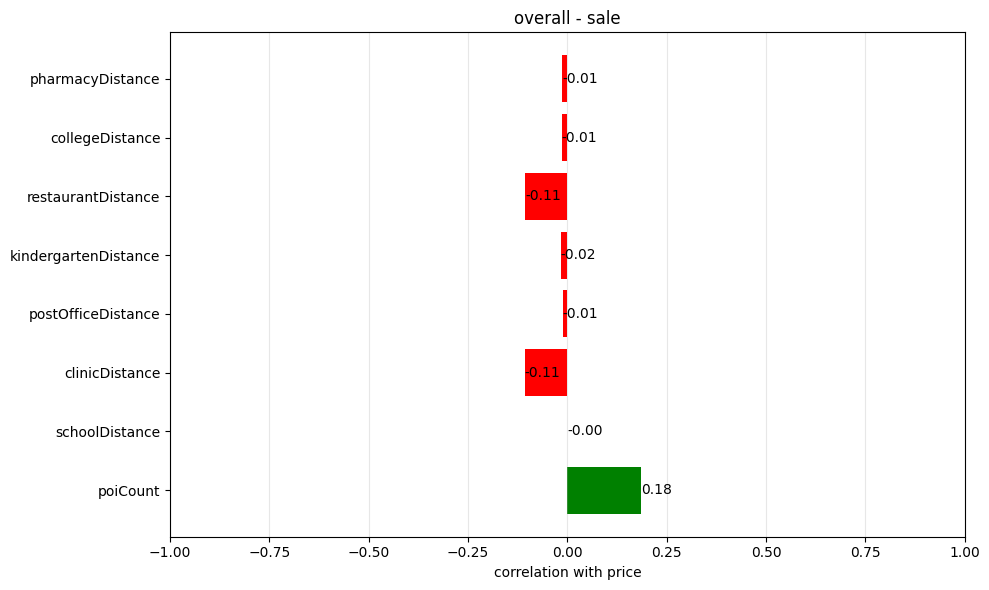

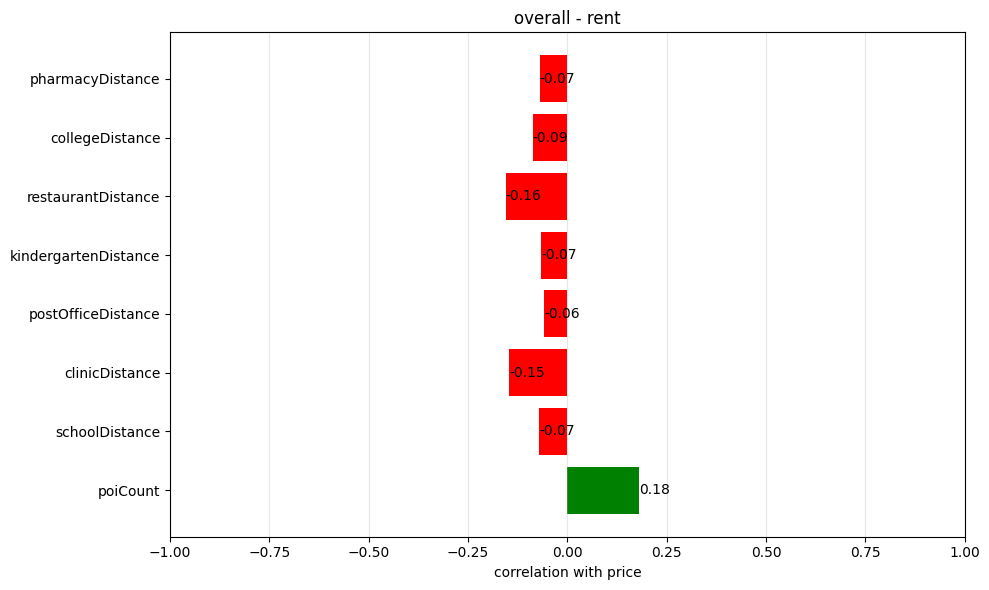

In [15]:
plot_price_correlations(buy_df, 'overall - sale', f'{output_dir}/buy_overall.png', show_plot=True)
plot_price_correlations(rent_df, 'overall - rent', f'{output_dir}/rent_overall.png', show_plot=True)